In [1]:
import pandas as pd
import matplotlib # Had to import this to make the plots function
from dateutil.parser import parse

# Step 2, importing the data
# Note: The data seems to be formatted Germanic (which commonly uses , instead . for decimals), adjusting with the import using decimal=','
data = pd.read_csv('../data/AirQualityUCI.csv', delimiter=';', decimal=',')
# Dropping irrelevant data, step 3
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1).dropna()
# Parsing the date data, step 4
data['Date_As_Date'] = data['Date'].apply(lambda x: parse(x))
data['Weekday'] = data['Date_As_Date'].apply(lambda x: x.weekday())
data['Day'] = data['Date_As_Date'].apply(lambda x: x.strftime("%A"))
data['Month'] = data['Date_As_Date'].apply(lambda x: x.strftime("%B"))

Q1: Which day of the week has the highest NO2(GT) emissions? Friday with 70.92485


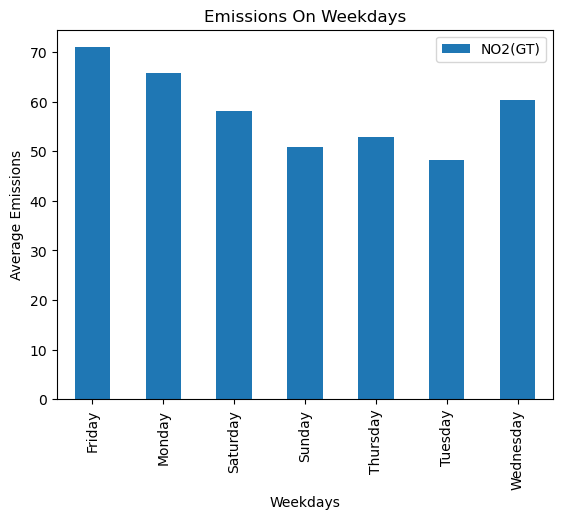

In [2]:
# Question 1
no2gt_by_day = pd.DataFrame(data.groupby(['Day'])['NO2(GT)'].agg('mean'))
no2gt_by_day.plot.bar(title='Emissions On Weekdays', xlabel='Weekdays', ylabel='Average Emissions')
print(f'Q1: Which day of the week has the highest NO2(GT) emissions? {no2gt_by_day.idxmax()[0]} with {round(no2gt_by_day.max()[0], 5)}')

Q2: At what time of the day are NMHC(GT) emissions highest? 19.00.00 with -132.05897


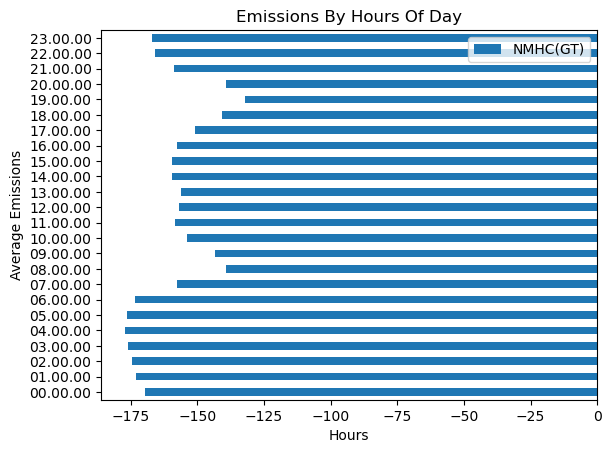

In [3]:
# Question 2
nmhcgt_by_hr = pd.DataFrame(data.groupby(['Time'])['NMHC(GT)'].agg('mean'))
nmhcgt_by_hr.plot.barh(title='Emissions By Hours Of Day', xlabel='Hours', ylabel='Average Emissions')
print(f'Q2: At what time of the day are NMHC(GT) emissions highest? {nmhcgt_by_hr.idxmax()[0]} with {round(nmhcgt_by_hr.max()[0], 5)}')

Q3: Which month has the lowest CO(GT) emissions? April with -72.7849


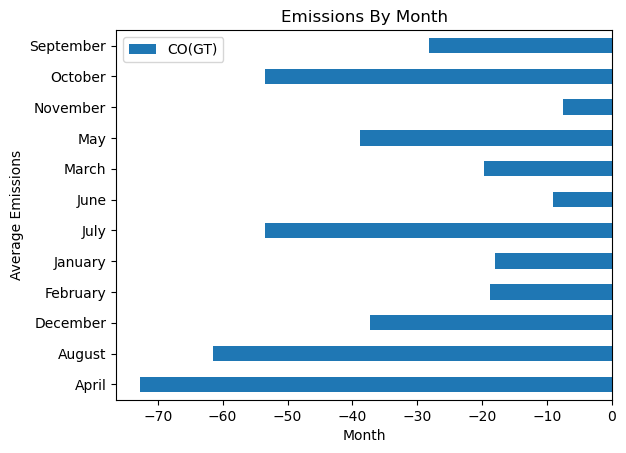

In [4]:
# Question 3
cogt_by_mo = pd.DataFrame(data.groupby(['Month'])['CO(GT)'].agg('mean'))
cogt_by_mo.plot.barh(title='Emissions By Month', xlabel='Month', ylabel='Average Emissions')
print(f'Q3: Which month has the lowest CO(GT) emissions? {cogt_by_mo.idxmin()[0]} with {round(cogt_by_mo.min()[0],5)}')